<a href="https://colab.research.google.com/github/SahilD95/Credit-Risk-Analysis/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

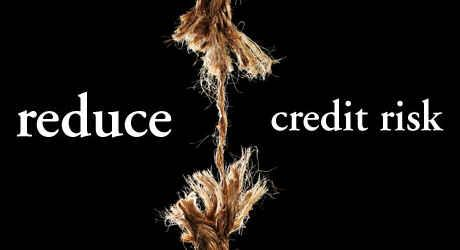

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Default = df = pd.read_csv("/content/drive/MyDrive/credit_risk.csv")
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
df.shape

(10000, 4)

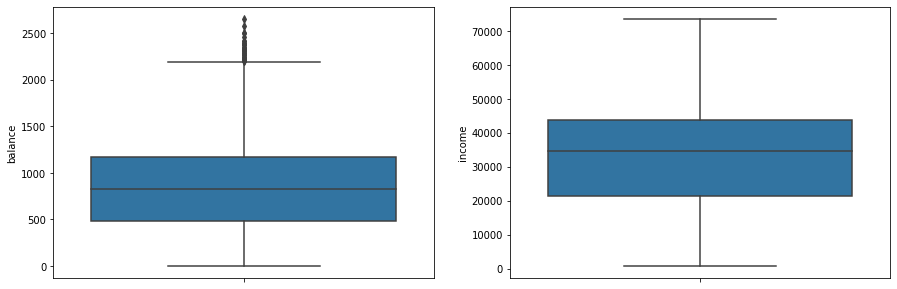

In [5]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y = df['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = df['income'])
plt.show()

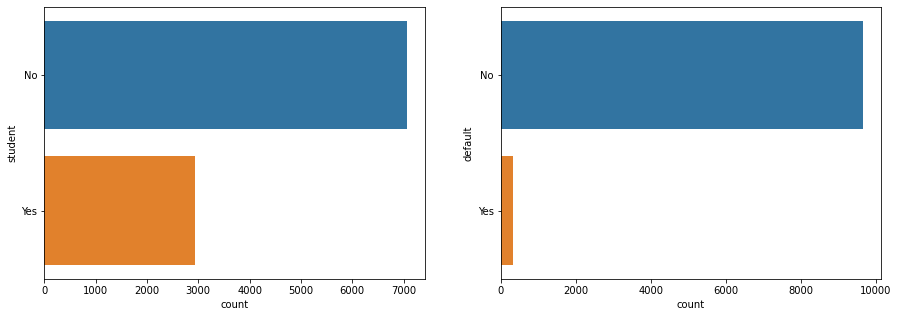

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y = df['student'])

plt.subplot(1,2,2)
sns.countplot(y = df['default'])
plt.show()

In [7]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [8]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [9]:
df['student'].value_counts(normalize = True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [10]:
df['default'].value_counts(normalize = True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

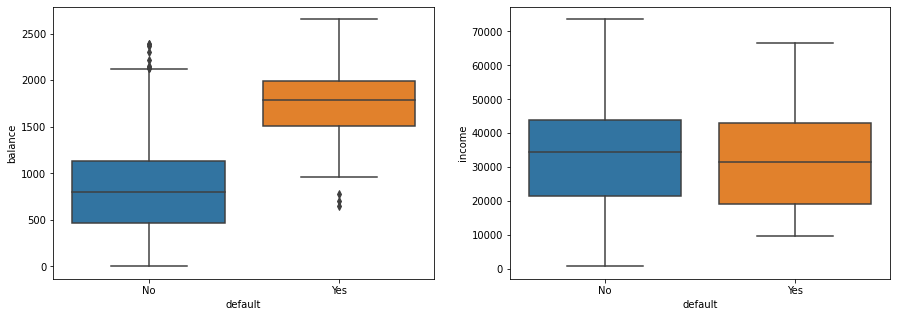

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['balance'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['income'])
plt.show()

In [12]:
pd.crosstab(df['student'],df['default'], normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


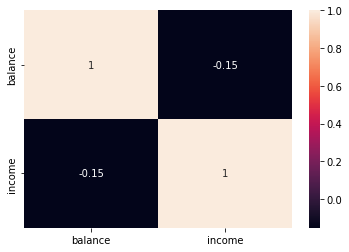

In [13]:
sns.heatmap(df[['balance', 'income']].corr(), annot = True)

In [14]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [15]:
Q1, Q3 = df['balance'].quantile([0.25,0.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [16]:
UL

2193.174308607817

In [17]:
df1 = Default[Default['balance']>UL]

In [18]:
df1

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [19]:
df1['default'].count()

31

In [20]:
df1['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [21]:
df1['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [22]:
df['balance'] = np.where(df['balance'] > UL, UL, df['balance'] )

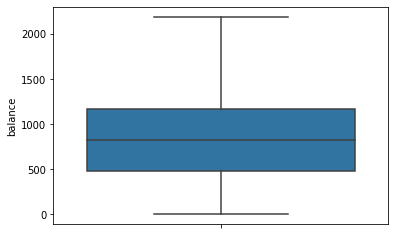

In [23]:
sns.boxplot(y = df['balance'])
plt.show()

In [34]:
df = pd.get_dummies(df, drop_first = True)

In [35]:
df.head()

,default,student,balance_Yes,income_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [36]:
df.columns = ['balance', 'income','default','student']

In [37]:
df.head()

,balance,income,default,student
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('default' , axis = 1)
y = df['default']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21, stratify = y)

In [41]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [49]:
print("Train Set")
print(y_train.value_counts(normalize=True).round(2))
print("Test Set")
print(y_test.value_counts(normalize=True).round(2))

Train Set
0    0.97
1    0.03
Name: default, dtype: float64
Test Set
0    0.97
1    0.03
Name: default, dtype: float64


In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [51]:
from sklearn.linear_model import LogisticRegression

In [55]:
 lr = LogisticRegression()

In [56]:
lr.fit(X_res,y_res)

LogisticRegression()

In [60]:
y_pred = lr.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
confusion_matrix(y_test, y_pred)

array([[2589,  311],
       [  25,   75]])

In [63]:
True_Positive = TP = 2589
False_Positive = FP = 311
False_Negative = FN = 25
True_Negative = TN = 75

In [77]:
Accuracy = Acc = (TP+TN)/(TP+FP+FN+TN)
Accuracy

0.888

In [67]:
Accuracy*100

88.8

Accuracy of our model is 88.8 percent

In [79]:
Precision = TP/(TP+FP)
Precision*100

89.27586206896552

In [80]:
Recall = TP/(TP+FN)
Recall*100

99.04361132364194

In [76]:
F1_Score = 2*(Precision*Recall)/Precision+Recall
F1_Score

2.971308339709258